<h2> Importing Required Libraries</h2>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ('ignore')
from tensorflow.keras.optimizers import SGD,Adam
from keras.callbacks import EarlyStopping
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
def calc_r2_bar(m, n, r2):    
    dfr = n - 1                     #number of features
    df = m - n                      #number of data points
    rdf = (dfr + df) / df           #ratio of total degrees of freedom to degrees of freedom for error 
    r2_bar = 1 - rdf * (1 - r2)
    return r2_bar

<h3>Loading the Dataset</h3> 

In [2]:
data=pd.read_csv("winequality.csv")

In [3]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.00,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [4]:
data.shape

(4898, 12)

<h3>Checking the presence of Null values</h3>

In [5]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<p> Now, there are no null values present in the dataset</p>

<h3>Exploratory Data Analysis(EDA)</h3>

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.844334,0.277854,0.334114,6.390639,0.045760,35.308085,138.360657,0.994027,3.183646,0.489635,10.514267,5.877909
std,0.887413,0.101286,0.121149,5.072884,0.021865,17.007137,42.498065,0.002991,0.193084,0.114552,1.230621,0.885639
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,9.000000,0.987110,0.000000,0.000000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.080000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


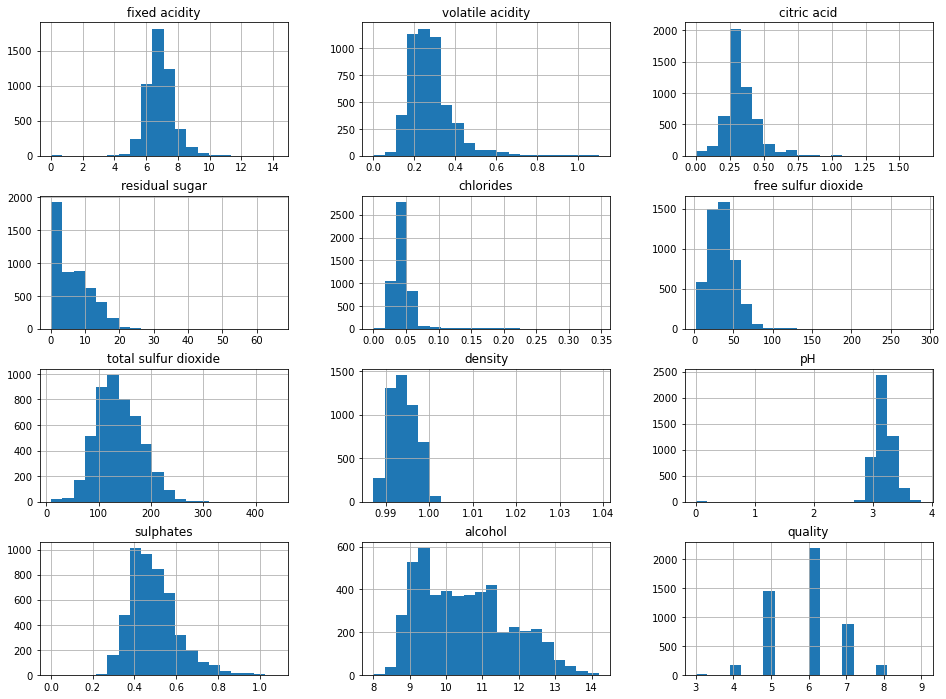

In [7]:
#Plotting Histograms
data.hist(figsize=(16,12),bins=20)
plt.show()

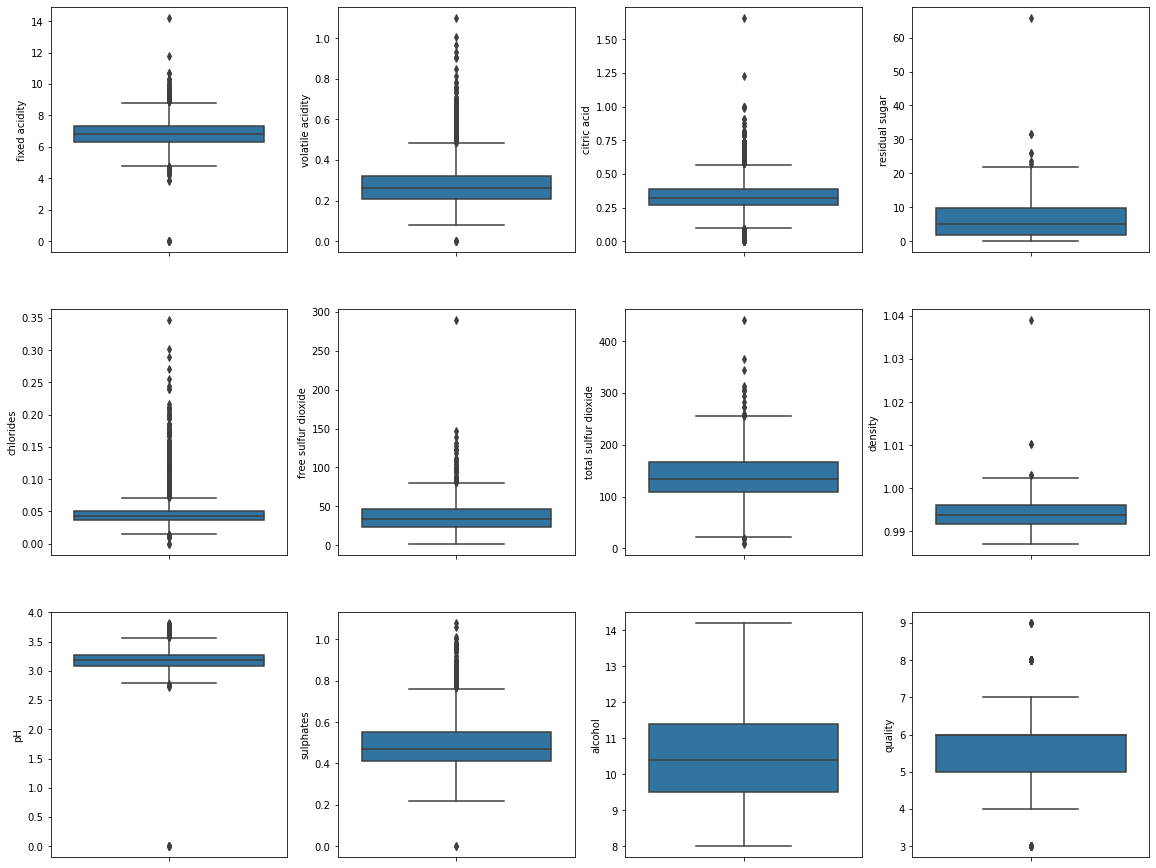

In [8]:
#Boxplots
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(16,12))
index = 0
ax = ax.flatten()

for col, value in data.items():
    if col != 'type':
        sns.boxplot(y=col, data=data, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

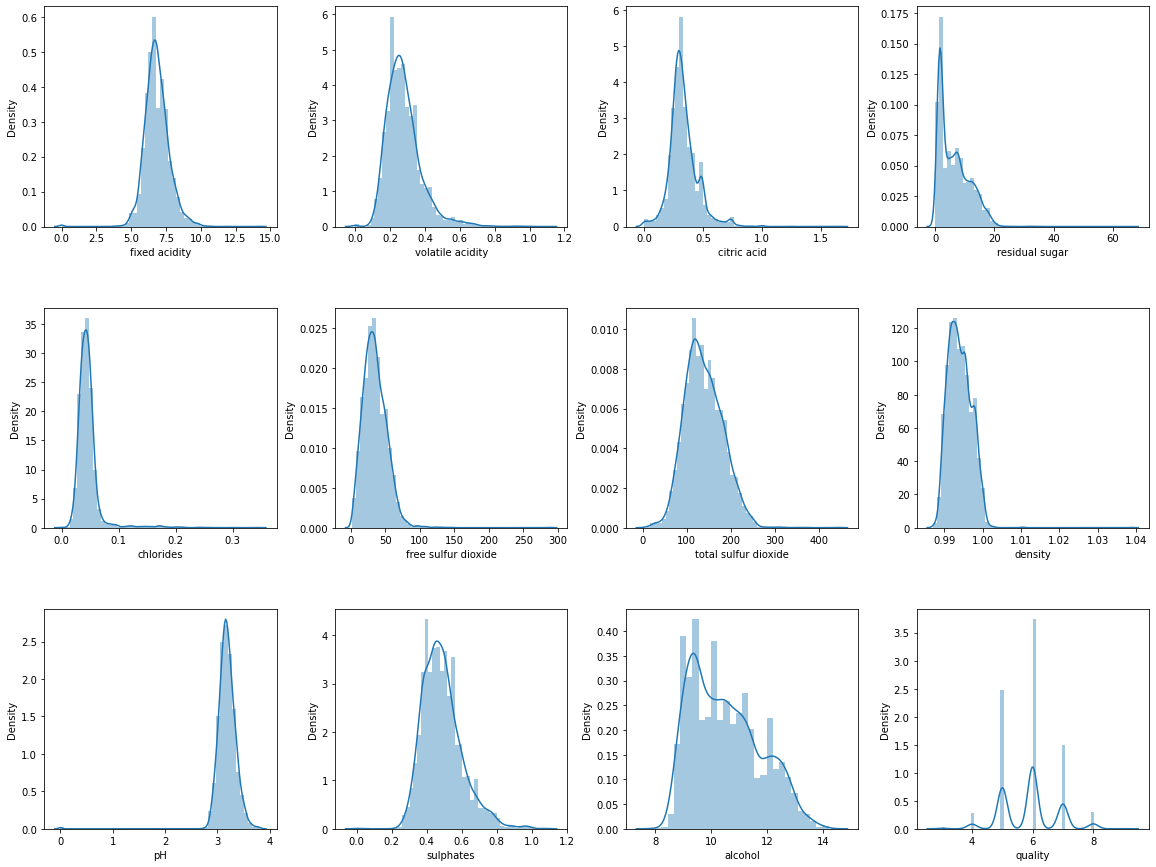

In [9]:
#distribution plot
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(16,12))
index = 0
ax = ax.flatten()

for col, value in data.items():
    if col != 'type':
        sns.distplot(value, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

<AxesSubplot:>

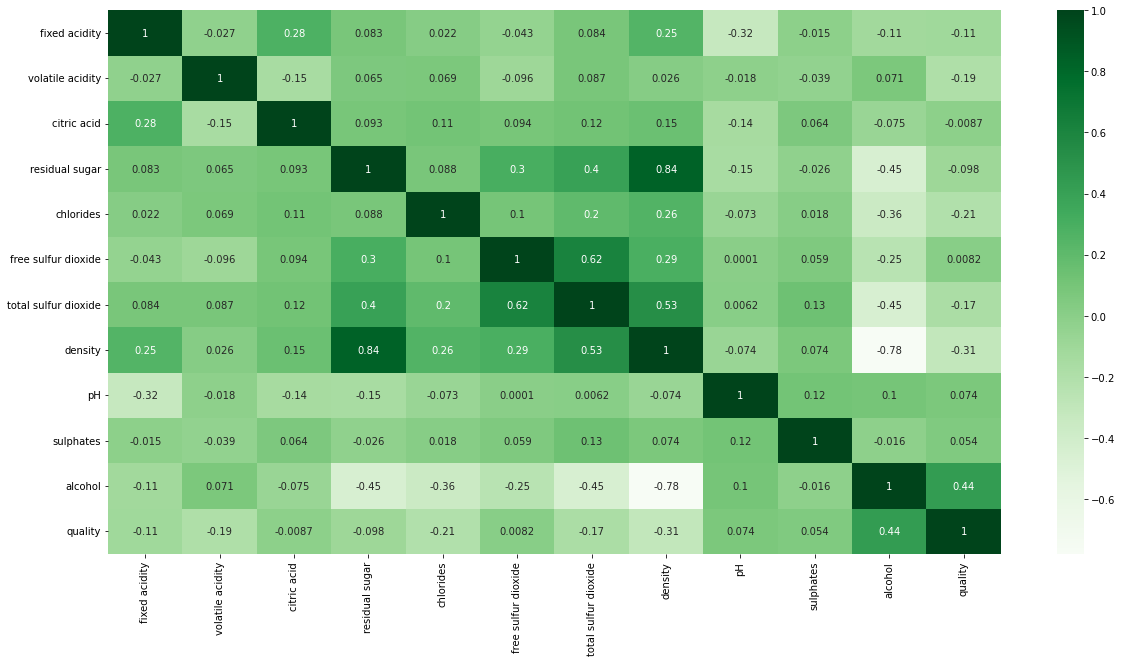

In [10]:
#Correlation Matrix
corr = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='Greens')

<h3>Forward Feature Selection</h3>

In [11]:
x=data.drop('quality',axis=1)
y=data['quality']
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, shuffle=True, random_state=1)
scaler = StandardScaler()
scaler.fit(x)
X_train = pd.DataFrame(scaler.transform(X_train), columns=x.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=x.columns)
y_train=pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [17]:
def adjusted_r2_score(r2, n, k):
    return 1-((1-r2)*(n-1)/(n-k-1))

def regression_fs():
    # create model
    model = Sequential()
    model.add(Dense(i+1, input_dim=i, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

columns = X_train.columns.to_list()
fws_col=[]
temp_r2=-1000;

for i in range(1,len(columns)+1):
    W_NN = regression_fs()
    W_NN2 = W_NN.fit(X_train.iloc[:,0:i], y_train, batch_size=10,validation_split = 0.2, verbose=0,epochs=100)
    
    predict_y = W_NN.predict(X_test.iloc[:,0:i])
    r2_fws=r2_score(y_test,predict_y)
    if(r2_fws>temp_r2):
        fws_col.append(columns[i-1])
        temp_r2=r2_fws;

In [18]:
fws_col

['fixed acidity',
 'volatile acidity',
 'residual sugar',
 'chlorides',
 'total sulfur dioxide',
 'density',
 'pH']

In [19]:
X_train = X_train[fws_col]
X_test = X_test[fws_col]

Building Neural nets with relu activation function


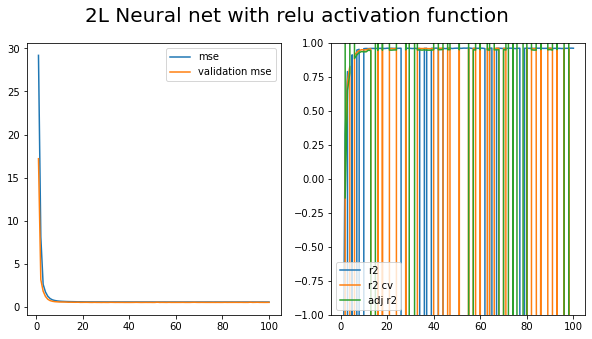

*******************************************************

Building Neural nets with sigmoid activation function


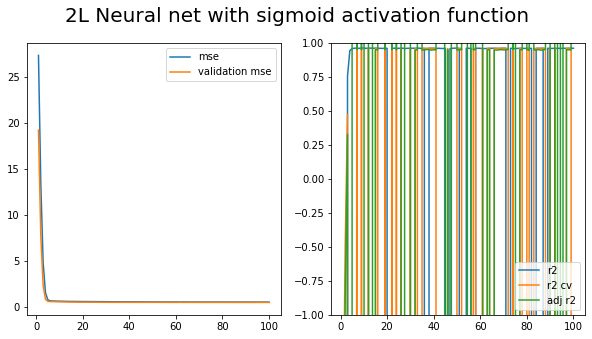

*******************************************************

Building Neural nets with tanh activation function


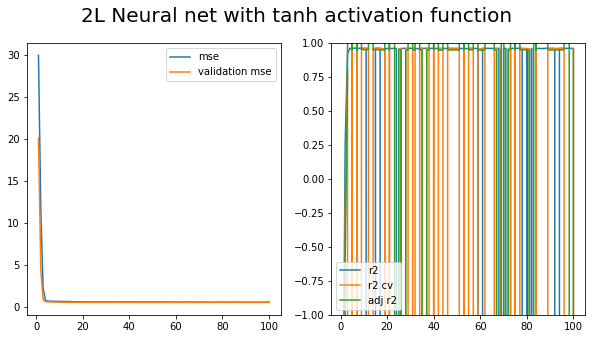

*******************************************************

Building Neural nets with elu activation function


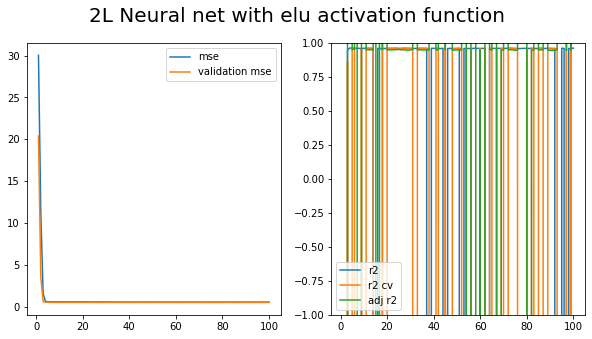

*******************************************************

Building Neural nets with softmax activation function


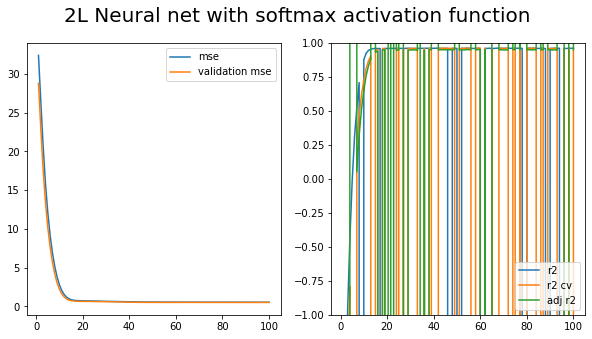

*******************************************************

Building Neural nets with softplus activation function


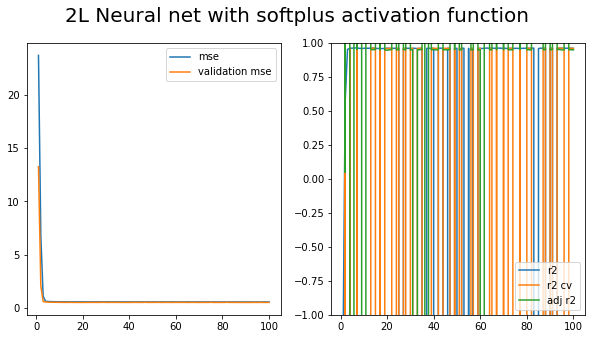

*******************************************************

Building Neural nets with softsign activation function


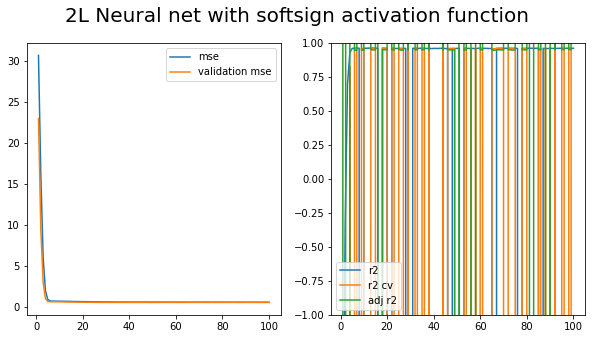

*******************************************************

Building Neural nets with selu activation function


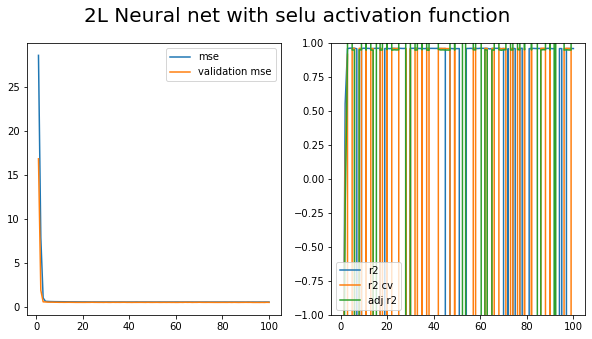

*******************************************************

Building Neural nets with exponential activation function


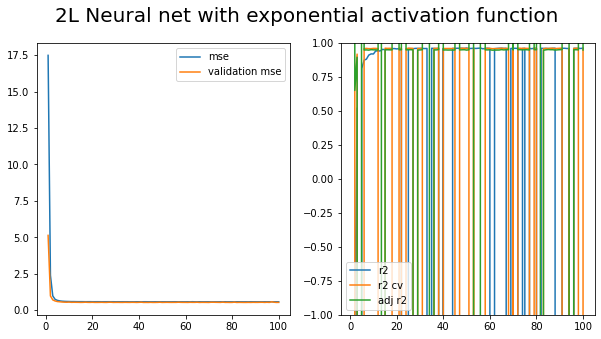

*******************************************************









In [20]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

def adjusted_r2_score(r2, n, k):
    return 1-((1-r2)*(n-1)/(n-k-1))

activation_list = ['relu', 'sigmoid', 'tanh', 'elu','softmax','softplus','softsign','selu','exponential']
epoch_arr = [k for k in range(1,101)]

from keras import backend as K

def r2_coeff(y_true, y_pred):
    SS_res =  tf.reduce_sum(tf.square(y_true - y_pred), axis=-1)
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true, axis=-1)), axis=-1)
    return (1 - SS_res/(SS_tot + tf.keras.backend.epsilon()))
    

def adj_r2(y_true, y_pred):
    SS_res =  tf.reduce_sum(tf.square(y_true - y_pred), axis=-1)
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true, axis=-1)), axis=-1)
    return (1 - (1 - r2_coeff(y_true, y_pred)) * (tf.cast(tf.size(y_true), tf.float32) - 1) / (tf.cast(tf.size(y_true), tf.float32) - tf.cast(tf.rank(y_true), tf.float32) - 1))

def regression(i):
    # create model
    model = Sequential()
    model.add(Dense(len(fws_col)+1, input_dim=len(fws_col), kernel_initializer='normal', activation=i))
    model.add(Dense(1, kernel_initializer='normal'))
    
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mse',r2_coeff, adj_r2])
    return model

r2_scores = []
adjusted_r2_scores = []
r2_scores_cv=[]
for i in activation_list:
    print("Building Neural nets with "+i+" activation function")
    Wine_NN = regression(i)
    Wine_NN_cv = regression(i)
    Wine_NN2 = Wine_NN.fit(X_train, y_train, batch_size=10,verbose=0,epochs=100)
    Wine_NN_CV = Wine_NN_cv.fit(X_train, y_train, batch_size=10,validation_split = 0.2, verbose=0,epochs=100)
    plt.subplots(1,2,figsize=(10,5))
    plt.suptitle("2L Neural net with "+i+" activation function", fontsize=20)
    plt.subplot(121)
    plt.plot( epoch_arr, Wine_NN_CV.history['mse'],label="mse")
    plt.plot( epoch_arr,  Wine_NN_CV.history['val_mse'],label="validation mse")
    plt.legend()
    plt.subplot(122)
    plt.plot( epoch_arr, Wine_NN2.history['r2_coeff'],label="r2")
    plt.plot( epoch_arr, Wine_NN_CV.history['r2_coeff'],label="r2 cv")
    plt.plot( epoch_arr, Wine_NN_CV.history['adj_r2'],label="adj r2")
    plt.ylim([-1, 1])
    plt.legend()
    plt.show()
    
    predict_y = Wine_NN.predict(X_test)
    predict_y_cv = Wine_NN_cv.predict(X_test)
    r2=r2_score(y_test,predict_y)
    r2_scores.append(r2)
    adjusted_r2_scores.append(adjusted_r2_score(r2, X_train.shape[0],X_train.shape[1]-1))
    r2_scores_cv.append(r2_score(y_test,predict_y_cv))
    
    print("*******************************************************\n")
print('\n')
print('\n')
print('\n')

In [21]:
for i in range(len(activation_list)):
    print("R2 for NN using",activation_list[i],"activation is ",r2_scores[i])
    print("Adj R2 for NN using",activation_list[i],"activation is ",adjusted_r2_scores[i])
    print("R2 CV for NN using",activation_list[i],"activation is ",r2_scores_cv[i])
    print('\n')

R2 for NN using relu activation is  0.2919127480226805
Adj R2 for NN using relu activation is  0.29067085281313243
R2 CV for NN using relu activation is  0.2791078523634415


R2 for NN using sigmoid activation is  0.2785013243538934
Adj R2 for NN using sigmoid activation is  0.2772359072086503
R2 CV for NN using sigmoid activation is  0.2834170633319626


R2 for NN using tanh activation is  0.26081641915310827
Adj R2 for NN using tanh activation is  0.2595199849277118
R2 CV for NN using tanh activation is  0.2670646027036867


R2 for NN using elu activation is  0.2889015542259715
Adj R2 for NN using elu activation is  0.28765437776451463
R2 CV for NN using elu activation is  0.2762266216613014


R2 for NN using softmax activation is  0.30592596513795567
Adj R2 for NN using softmax activation is  0.30470864733346215
R2 CV for NN using softmax activation is  0.29442557583302553


R2 for NN using softplus activation is  0.26355838323799075
Adj R2 for NN using softplus activation is  0.262